# Data Exploration

In [1]:
import numpy as np

import pandas as pd
import pandas_datareader.data as web 

% matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc 
import matplotlib.dates as mdates 

import datetime as dt

style.use('ggplot')

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [8]:
# Extracting data 
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2018,  1, 31)

stock_data = web.DataReader('^NSEI', 'yahoo', start, end)

In [9]:
stock_data.to_csv('Data/nifty50.csv')
# Loading data ...
stock_data = pd.read_csv('Data/nifty50.csv')

## Data Analysis

In [10]:
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [11]:
stock_data.set_index('Date', inplace = True)

In [12]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0


In [13]:
stock_data.shape

(2563, 6)

In [14]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [15]:
# Some basic information about dataset 
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2563 entries, 2007-09-17 to 2018-01-31
Data columns (total 6 columns):
Open         2538 non-null float64
High         2538 non-null float64
Low          2538 non-null float64
Close        2538 non-null float64
Adj Close    2538 non-null float64
Volume       2538 non-null float64
dtypes: float64(6)
memory usage: 140.2+ KB


In [16]:
# Cleaning data
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0


In [17]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2563 entries, 2007-09-17 to 2018-01-31
Data columns (total 6 columns):
Open         2563 non-null float64
High         2563 non-null float64
Low          2563 non-null float64
Close        2563 non-null float64
Adj Close    2563 non-null float64
Volume       2563 non-null float64
dtypes: float64(6)
memory usage: 140.2+ KB


In [18]:
display(stock_data.describe())

,Open,High,Low,Close,Adj Close,Volume
count,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000,2563.000000
mean,6403.617126,6445.988670,6353.244496,6400.489623,6400.489623,85842.606321
std,1855.432620,1848.064011,1858.680769,1852.835402,1852.835402,96808.267875
min,2526.199951,2585.300049,2252.750000,2524.199951,2524.199951,0.000000
25%,5129.350098,5166.574951,5082.000000,5128.550049,5128.550049,0.000000
50%,5884.799805,5917.799805,5836.899902,5882.250000,5882.250000,0.000000
75%,8045.699952,8100.625000,7996.375000,8045.724853,8045.724853,163700.000000
max,11120.849609,11171.549805,11075.950195,11130.400391,11130.400391,594200.000000


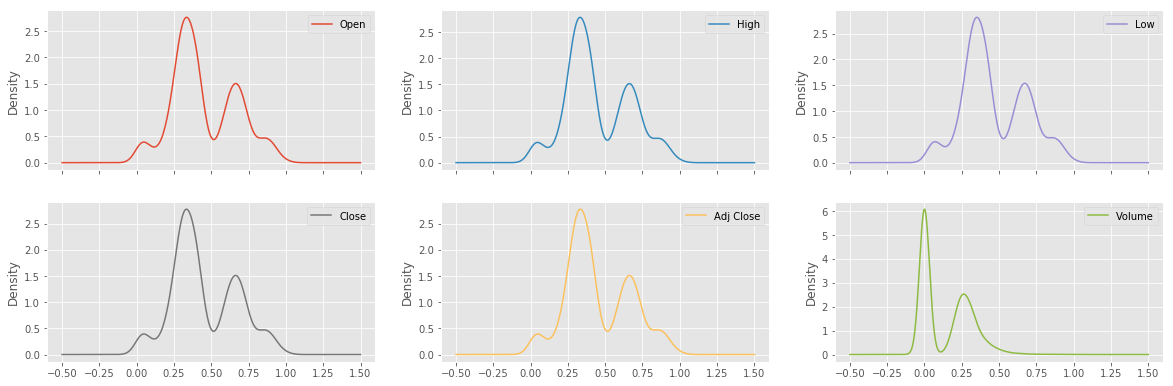

In [22]:
stock_norm_data = pd.DataFrame()

stock_norm_data['Open'] = (stock_data['Open'] - min(stock_data['Open'])) / (max(stock_data['Open']) - min(stock_data['Open']))
stock_norm_data['High'] = (stock_data['High'] - min(stock_data['High'])) / (max(stock_data['High']) - min(stock_data['High']))
stock_norm_data['Low'] = (stock_data['Low'] - min(stock_data['Low'])) / (max(stock_data['Low']) - min(stock_data['Low']))
stock_norm_data['Close'] = (stock_data['Close'] - min(stock_data['Close'])) / (max(stock_data['Close']) - min(stock_data['Close']))
stock_norm_data['Adj Close'] = (stock_data['Adj Close'] - min(stock_data['Adj Close'])) / (max(stock_data['Adj Close']) - min(stock_data['Adj Close']))
stock_norm_data['Volume'] = (stock_data['Volume'] - min(stock_data['Volume'])) / (max(stock_data['Volume']) - min(stock_data['Volume']))

stock_norm_data.plot(kind = 'density', subplots = True, sharex = True, layout = (3, 3), figsize = (20, 10))
plt.show()

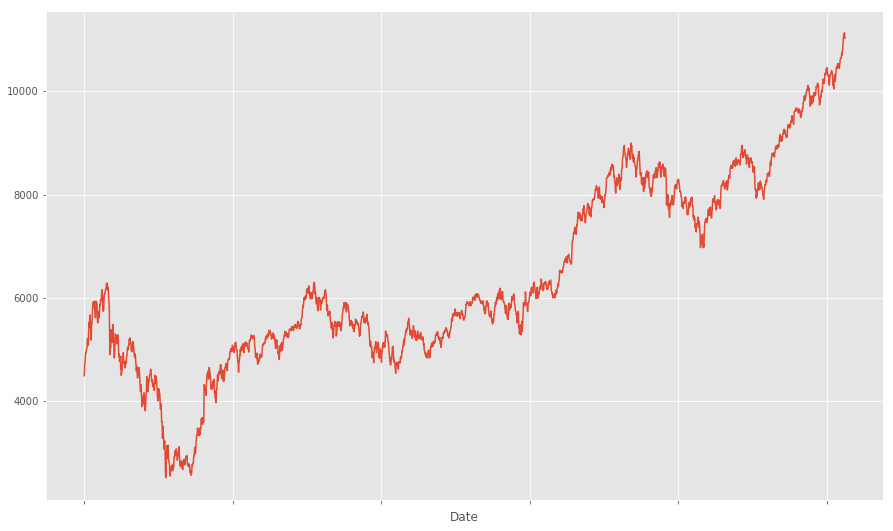

In [23]:
# Visualizing Adj Close price 
fig = plt.figure(figsize = (15, 9))
stock_data['Adj Close'].plot()
plt.show()
#fig.savefig('Figures/Fig1_Nifty50_Adj_Close.png')

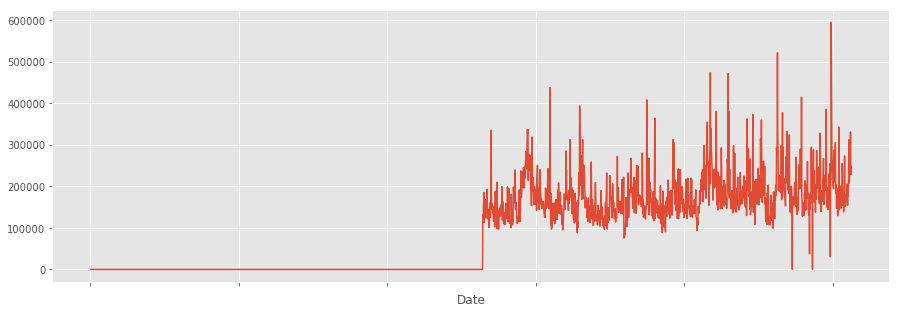

In [24]:
# Plotting total volumes traded over time 
fig = plt.figure(figsize = (15, 5))
stock_data['Volume'].plot()
plt.show()
fig.savefig('Figures/Fig1_Nifty50_Volume.png')

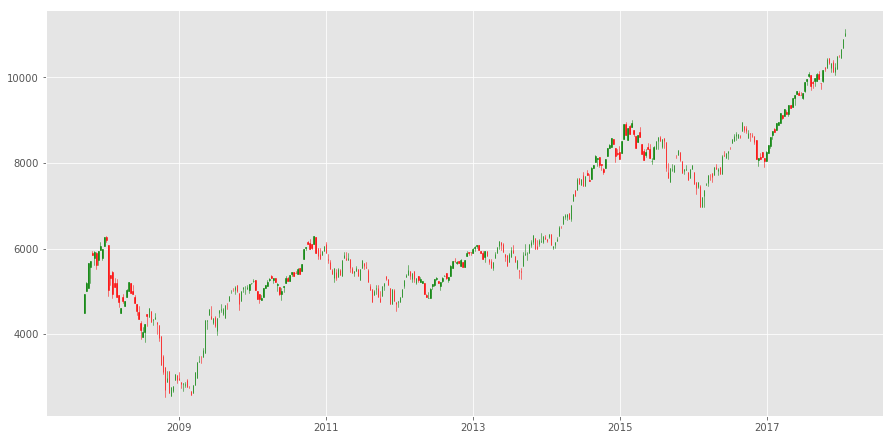

In [25]:
# Japenese Candlestick Plot ...

def plot_candlestick_ohlc():
    df = pd.read_csv('Data/nifty50.csv', parse_dates = True, index_col = 0)
    df_ohlc = df['Adj Close'].resample('10D').ohlc()
    df_volume = df['Volume'].resample('10D').sum()
    df_ohlc.reset_index(inplace = True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    fig = plt.figure(figsize = (15, 9))
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
    #ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
    #ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    plt.show()
    #fig.savefig('Figures/Fig2_CandleStick_Plot.png')
    return
plot_candlestick_ohlc()

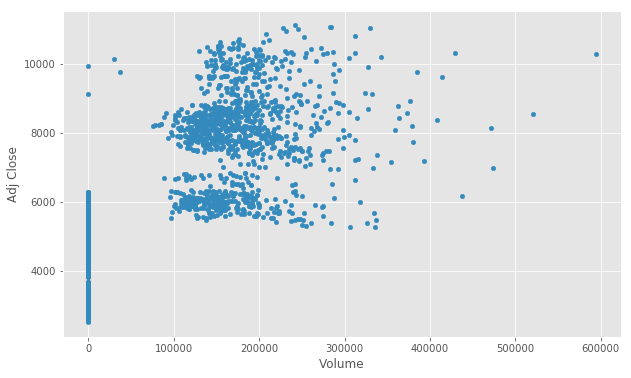

In [26]:
# Scatter plots 
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.plot.scatter(x = 'Volume', y = 'Adj Close', figsize = (10, 6))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde7414e8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fde743dbf60>]], dtype=object)

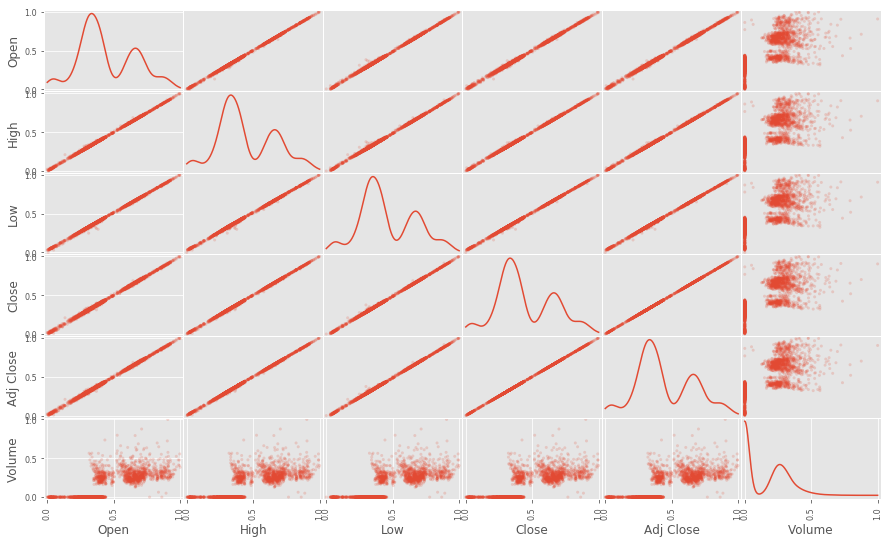

In [27]:
# Scatter Matrix 
from pandas.plotting import scatter_matrix 
scatter_matrix(stock_norm_data, alpha = 0.2, figsize = (15, 9), diagonal = 'kde')

In [28]:
# Percentage change, from one day to next ...
pct_data = stock_data.pct_change()
pct_data = pct_data.replace([np.inf, -np.inf], 0)
pct_data.fillna(0, inplace = True)

pct_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2007-09-18,-0.005389,0.000605,-0.000290,0.011469,0.011469,0.0
2007-09-19,0.012494,0.041127,0.015330,0.040946,0.040946,0.0
2007-09-20,0.040569,0.004611,0.037558,0.003212,0.003212,0.0
2007-09-21,0.003823,0.019923,0.002658,0.018957,0.018957,0.0


In [35]:
# Moving Average 
ma_days = [10, 20, 30]

for ma in ma_days:
    column_name = "MA for %s days" %(str(ma))
    
    stock_data[column_name] = stock_data['Adj Close'].rolling(window=ma,center=False).mean()
    
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 30 days
Date,,,,,,,,,,
2018-01-24,11069.349609,11110.099609,11046.150391,11086.000000,11086.000000,283400.0,10969.520117,10841.060058,10689.587549,10594.058366
2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0,11020.050195,10882.905078,10719.175049,10623.281706
2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0,11067.190234,10927.820117,10749.160059,10652.558398
2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0,11083.880274,10958.630176,10775.107568,10676.438411
2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0,11072.680274,10991.355176,10804.382568,10697.736751


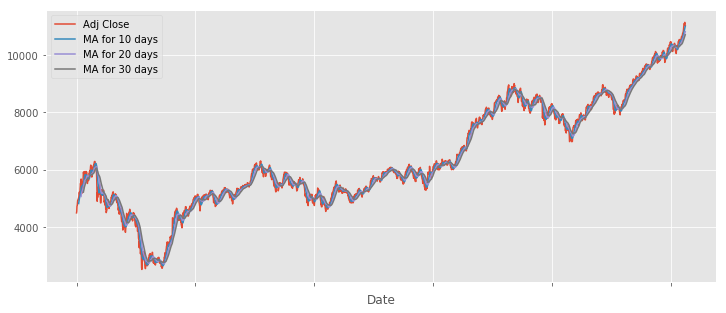

In [37]:
# Plotting moving averages 
stock_data[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False,figsize=(12,5))

In [38]:
# Feature relevance 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in list(pct_data.columns.values):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature 
    new_data = pct_data.drop(col, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(new_data, pct_data[col], test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    
    # Report the score of the prediction using the testing set 
    score = regressor.score(X_test, y_test)
    print("{} R^2 score : {:2f}".format(col, score))

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Open R^2 score : 0.488853
High R^2 score : 0.608699
Low R^2 score : 0.356990
Close R^2 score : 0.998775
Adj Close R^2 score : 0.998775
Volume R^2 score : -1.260289


Close has the highest score, hence it is best to use this to determine prediction. Volume has the lowest score, which makes it not so useful for prediction. 